In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x=dataset.iloc[:,[3,4]].values

In [44]:
from sklearn.cluster import AffinityPropagation
#aff= AffinityPropagation( random_state=5)
#y_aff=aff.fit(x)
#y_aff

af = AffinityPropagation(preference= -30, max_iter=50, damping=0.7, random_state=42, convergence_iter=20).fit(x)

y_af= af.labels_
y_af

C:\Anaconda3\envs\dineshML\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


array([ 0,  2,  3,  2,  1,  2,  3,  5,  3,  2,  4,  5,  4,  2,  4,  2,  6,
        7,  8,  5,  6,  9, 13,  9, 15, 10, 12, 11, 12, 10, 13, 16, 13, 14,
       15, 10, 15, 16, 17, 16, 18, 19, 20, 26, 21, 22, 25, 27, 23, 24, 25,
       26, 25, 26, 27, 23, 25, 27, 29, 27, 28, 28, 29, 28, 29, 28, 29, 29,
       28, 29, 28, 32, 29, 28, 30, 31, 31, 30, 31, 32, 31, 31, 32, 32, 33,
       30, 33, 33, 33, 34, 36, 35, 34, 35, 35, 34, 34, 34, 35, 34, 35, 37,
       36, 36, 36, 35, 37, 37, 38, 37, 36, 36, 38, 37, 37, 37, 38, 39, 38,
       39, 39, 38, 39, 40, 42, 41, 42, 40, 44, 41, 43, 41, 42, 41, 43, 45,
       43, 41, 44, 41, 43, 49, 47, 45, 44, 46, 47, 51, 48, 49, 50, 49, 48,
       51, 50, 49, 52, 51, 53, 51, 47, 45, 53, 49, 54, 55, 56, 60, 57, 58,
       61, 59, 61, 60, 61, 62, 61, 63, 61, 65, 64, 65, 70, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81], dtype=int64)

In [45]:
supervised=pd.DataFrame(dataset)
supervised['cluster_group']=y_af
supervised


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,77
196,197,Female,45,126,28,78
197,198,Male,32,126,74,79
198,199,Male,32,137,18,80


In [46]:
supervised.to_csv('cluster.csv',index=False)
centroids=af.cluster_centers_
centroids

array([[ 15,  39],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 19,  14],
       [ 19,  99],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 25,  73],
       [ 28,  82],
       [ 28,  61],
       [ 29,  31],
       [ 30,   4],
       [ 33,  92],
       [ 33,  14],
       [ 34,  73],
       [ 37,  26],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  28],
       [ 39,  65],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 44,  46],
       [ 46,  56],
       [ 48,  50],
       [ 54,  47],
       [ 54,  53],
       [ 54,  42],
       [ 57,  58],
       [ 60,  49],
       [ 61,  42],
       [ 62,  55],
       [ 63,  48],
       [ 65,  43],
       [ 67,  57],
       [ 71,  95],
       [ 71,  75],
       [ 72,  34],
       [ 73,   7],
       [ 74,  10],
       [ 76,  87],
       [ 77,  97],
       [ 77,  36],
       [ 78,  22],
       [ 78,  90],
       [ 78,  17],
       [ 78,  76],
       [ 78,

C:\Anaconda3\envs\dineshML\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


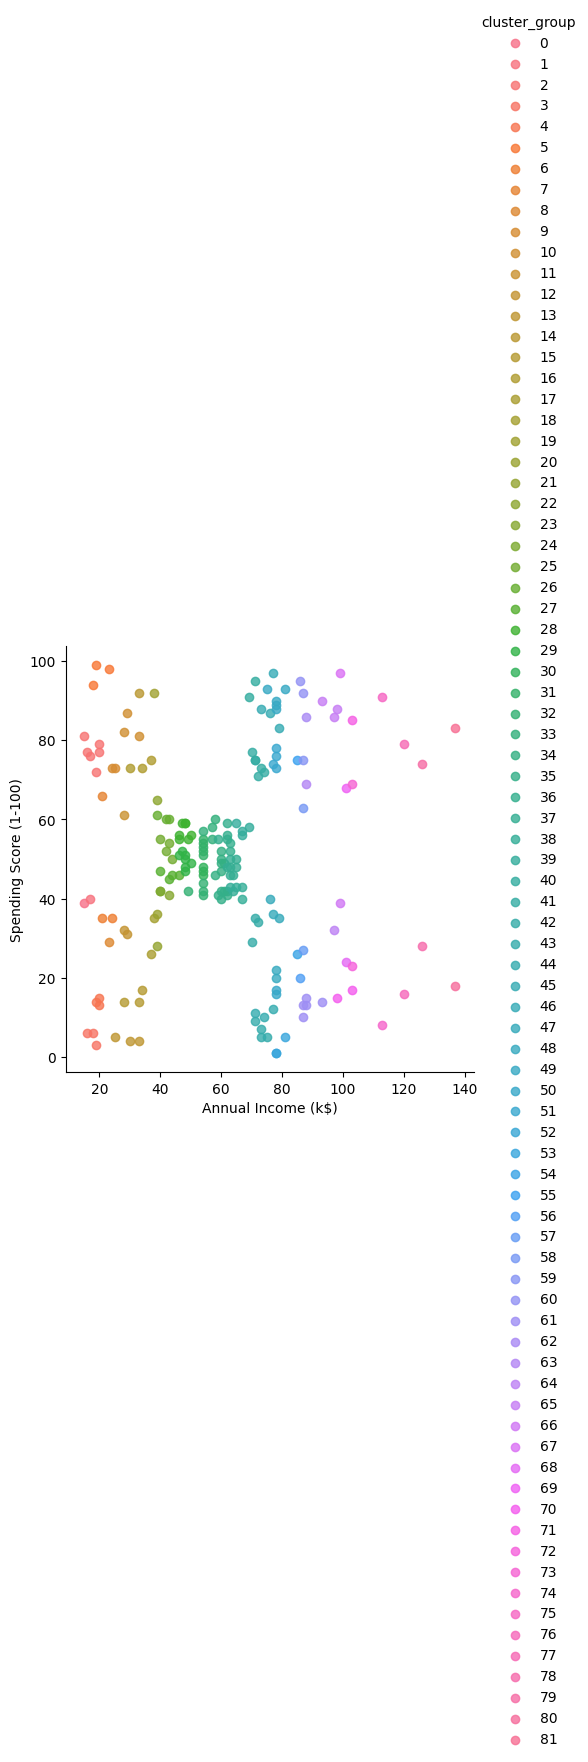

In [47]:
import seaborn as sns
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False,legend=True,legend_out=True)

In [48]:
y_pred=af.predict(x)

In [49]:
from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(x,y_pred)

In [50]:
silhouette_avg

0.34825754556232213

In [55]:
import pickle
filename="finalized_model_ Affinity_Propagation.sav"

In [56]:
pickle.dump(af,open(filename,'wb'))

In [57]:
loaded_model=pickle.load(open("finalized_model_ Affinity_Propagation.sav",'rb'))
result=loaded_model.predict([[120,79]])

In [58]:
result

array([77], dtype=int64)